In [1]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

### Pandas reference
Ref.: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

#### 10 simple hacks to speed up your Data analysis
Ref.: https://towardsdatascience.com/10-simple-hacks-to-speed-up-your-data-analysis-in-python-ec18c6396e6b

### Aplying Filter Methods in Python For Feature Selection
Ref.: https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

In [111]:
df_train = pd.read_csv('train.csv')

In [112]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [0,1,0,1,1,1],
        'e': [1,1,1,1,1,1]
       }
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e'])

### Remove duplicate rows

In [113]:
# Remove Duplicate rows
df.drop_duplicates(subset=None, inplace=True)

In [114]:
df

,a,b,c,d,e
0,0,0,1,0,1
1,0,1,0,1,1
2,1,0,0,0,1
3,0,1,1,1,1


### Get and remove duplicate columns

In [115]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


In [116]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)

print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)


Duplicate Columns are as follows
Column name :  d


In [117]:
# Delete duplicate columns
newDf = df.drop(columns=getDuplicateColumns(df))

print("Modified Dataframe", newDf, sep='\n')

Modified Dataframe
   a  b  c  e
0  0  0  1  1
1  0  1  0  1
2  1  0  0  1
3  0  1  1  1


### Drops constant features

In [118]:
# Drops constant columns of pandas dataframe.
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result

In [2]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [2,2,2,2,2,2],
        'd': [0,1,0,1,1,1],
        'e': [1,0,0,1,0,1],
        'f': [1,1,1,1,1,1]
       }
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f'])

In [3]:
df

,a,b,c,d,e,f
0,0,0,2,0,1,1
1,0,1,2,1,0,1
2,1,0,2,0,0,1
3,0,1,2,1,1,1
4,0,1,2,1,0,1
5,0,1,2,1,1,1


In [121]:
df1 = drop_constant_columns(df)

In [122]:
df1

,a,b,d,e
0,0,0,0,1
1,0,1,1,0
2,1,0,0,0
3,0,1,1,1
4,0,1,1,0
5,0,1,1,1


### Other option for droping constant features: Remove Duplicate Features

In [123]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [1,0,0,1,0,1],
        'e': [5,5,5,5,5,5],
        'f': [0,0,1,0,0,0],
        'g': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df

,a,b,c,d,e,f,g
0,0,0,1,1,5,0,0
1,0,1,0,0,5,0,0
2,1,0,0,0,5,1,0
3,0,1,1,1,5,0,0
4,0,1,0,0,5,0,0
5,0,1,1,1,5,0,1


In [124]:
# removing duplicate features using transpose
df_T = df.T  
df_T.shape

(7, 6)

In [125]:
print(df_T.duplicated().sum())

2


In [126]:
unique_df = df_T.drop_duplicates(keep='first').T  

In [127]:
unique_df

,a,b,c,e,g
0,0,0,1,5,0
1,0,1,0,5,0
2,1,0,0,5,0
3,0,1,1,5,0
4,0,1,0,5,0
5,0,1,1,5,1


In [128]:
duplicated_features = [dup_col for dup_col in df.columns if dup_col not in unique_df.columns]  
duplicated_features  

['d', 'f']

### Remove features with low variance
#from sklearn.feature_selection import VarianceThreshold

In [4]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [5,5,5,5,5,5],
        'e': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e'])

In [5]:
df

,a,b,c,d,e
0,0,0,1,5,0
1,0,1,0,5,0
2,1,0,0,5,0
3,0,1,1,5,0
4,0,1,0,5,0
5,0,1,1,5,1


In [6]:
# Suppose we wish to remove those that are constant in at least 80% of the instances
variance_filter = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance_filter.fit(df)

VarianceThreshold(threshold=0.15999999999999998)

In [132]:
len(df.columns[variance_filter.get_support()])  

2

In [7]:
df.columns[variance_filter.get_support()]

Index(['b', 'c'], dtype='object')

In [133]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[variance_filter.get_support()]]

print(len(constant_columns))  

3


In [134]:
for column in constant_columns:
    print(column)

a
d
e


In [135]:
#df1 = variance_filter.transform(df)  

df.drop(labels=constant_columns, axis=1, inplace=True)  


df.shape

(6, 2)

In [136]:
df

,b,c
0,0,1
1,1,0
2,0,0
3,1,1
4,1,0
5,1,1


### Remove Duplicate Features

In [8]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [1,0,0,1,0,1],
        'e': [5,5,5,5,5,5],
        'f': [0,0,1,0,0,0],
        'g': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [9]:
df

,a,b,c,d,e,f,g
0,0,0,1,1,5,0,0
1,0,1,0,0,5,0,0
2,1,0,0,0,5,1,0
3,0,1,1,1,5,0,0
4,0,1,0,0,5,0,0
5,0,1,1,1,5,0,1


In [139]:
# removing duplicate features using transpose
df_T = df.T  
df_T.shape  

(7, 6)

In [140]:
print(df_T.duplicated().sum())

2


In [141]:
unique_df = df_T.drop_duplicates(keep='first').T  

In [142]:
unique_df

,a,b,c,e,g
0,0,0,1,5,0
1,0,1,0,5,0
2,1,0,0,5,0
3,0,1,1,5,0
4,0,1,0,5,0
5,0,1,1,5,1


In [143]:
duplicated_features = [dup_col for dup_col in df.columns if dup_col not in unique_df.columns]  
duplicated_features  

['d', 'f']

### Select numeric columns only

In [144]:
alfa = {'a': [0,0,1,0,0,0],
        'b': ['b0','b2','b4','b1','b3','b2'],
        'c': ['c4','c5','c1','c0','c7','c2'],
        'd': [1,0,0,1,0,1],
        'e': ['e3','e5','e2','e8','e0','e9'],
        'f': [0,0,1,0,0,0],
        'g': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [145]:
df

,a,b,c,d,e,f,g
0,0,b0,c4,1,e3,0,0
1,0,b2,c5,0,e5,0,0
2,1,b4,c1,0,e2,1,0
3,0,b1,c0,1,e8,0,0
4,0,b3,c7,0,e0,0,0
5,0,b2,c2,1,e9,0,1


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
a    6 non-null int64
b    6 non-null object
c    6 non-null object
d    6 non-null int64
e    6 non-null object
f    6 non-null int64
g    6 non-null int64
dtypes: int64(4), object(3)
memory usage: 464.0+ bytes


In [147]:
df_numerics_only = df.select_dtypes(include=[np.number])

In [148]:
df_numerics_only

,a,d,f,g
0,0,1,0,0
1,0,0,0,0
2,1,0,1,0
3,0,1,0,0
4,0,0,0,0
5,0,1,0,1


#### Select non numeric columns only (From the function above)

In [149]:
df_chars = [char_col for char_col in df.columns if char_col not in df_numerics_only.columns]  
df_chars 

['b', 'c', 'e']

In [150]:
df_chars1 = df[['b', 'c', 'e']]

In [151]:
df_chars1

,b,c,e
0,b0,c4,e3
1,b2,c5,e5
2,b4,c1,e2
3,b1,c0,e8
4,b3,c7,e0
5,b2,c2,e9


#### Select objetct columns only

In [152]:
df.select_dtypes(include=[object])

,b,c,e
0,b0,c4,e3
1,b2,c5,e5
2,b4,c1,e2
3,b1,c0,e8
4,b3,c7,e0
5,b2,c2,e9


### MODE calculation

In [153]:
import statistics
data = (21, 19, 18, 46, 30, 18, 19, 21, 18)
print(statistics.mode(data))

18


### Correlation

In [12]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


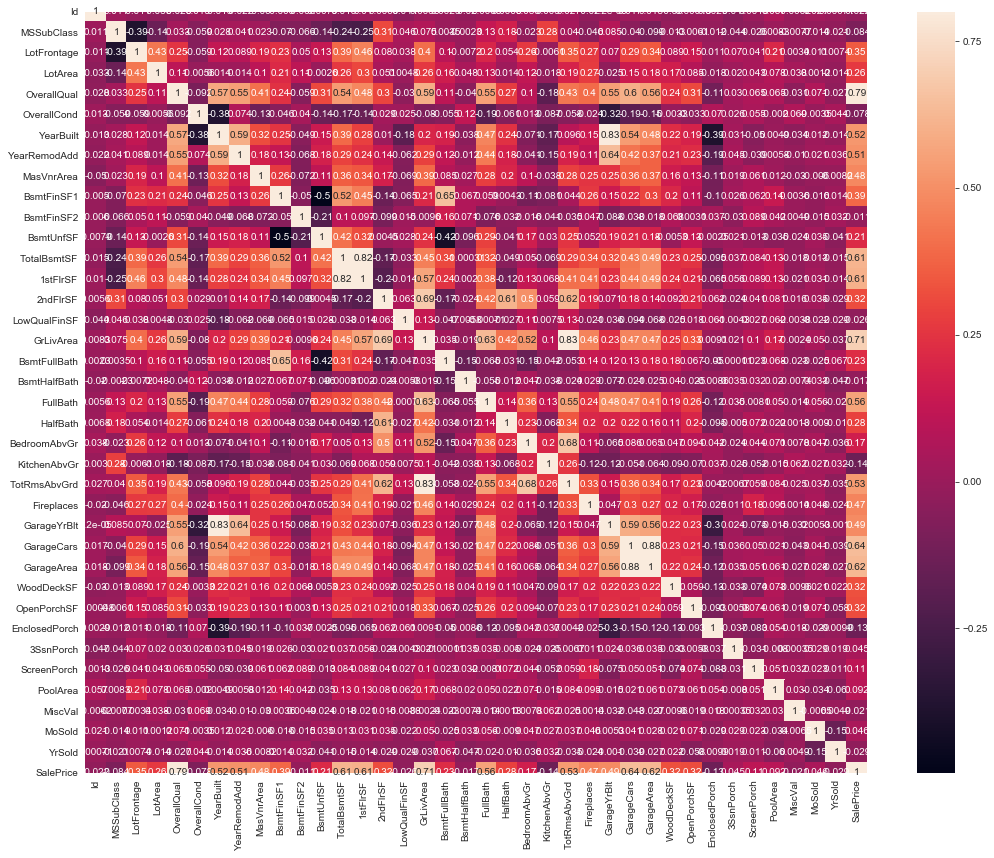

In [13]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(18, 14))
sb.heatmap(corrmat, vmax=.8, square=True, annot = True);

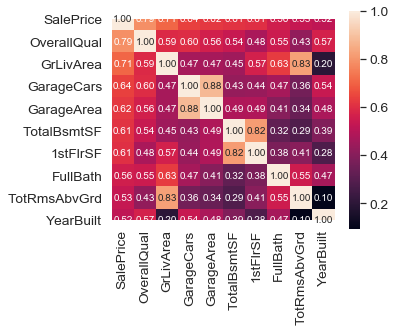

In [156]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Removing Correlated Features

In [14]:
alfa = {'a': [3,7,2,15,7,20],
        'b': ['b0','b2','b4','b1','b3','b2'],
        'c': [1,1,1,1,0,1],
        'd': ['c4','c5','c1','c0','c7','c2'],
        'e': [1,0,0,1,0,1],
        'f': ['e3','e5','e2','e8','e0','e9'],
        'g': [1,2,3,4,1,6],
        'h': [1,2,1,4,5,6],
        'i': [5,4,3,2,1,1],
        'j': [1,2,3,4,5,6],}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
# np.corrcoef(df['a'], df['g'])

In [15]:
df

,a,b,c,d,e,f,g,h,i,j
0,3,b0,1,c4,1,e3,1,1,5,1
1,7,b2,1,c5,0,e5,2,2,4,2
2,2,b4,1,c1,0,e2,3,1,3,3
3,15,b1,1,c0,1,e8,4,4,2,4
4,7,b3,0,c7,0,e0,1,5,1,5
5,20,b2,1,c2,1,e9,6,6,1,6


In [16]:
df_numerics_only = df.select_dtypes(include=[np.number])

In [17]:
correlated_features = set()  
correlation_matrix = df_numerics_only.corr()  

In [19]:
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [20]:
len(correlated_features) 

4

In [21]:
print(correlated_features)  

{'i', 'g', 'h', 'j'}


In [164]:
df.drop(labels=correlated_features, axis=1, inplace=True)  

In [165]:
df

,a,b,c,d,e,f
0,3,b0,1,c4,1,e3
1,7,b2,1,c5,0,e5
2,2,b4,1,c1,0,e2
3,15,b1,1,c0,1,e8
4,7,b3,0,c7,0,e0
5,20,b2,1,c2,1,e9


### Correlations Matrix

In [22]:
iris=sb.load_dataset('iris')

In [23]:
irisNum=iris.iloc[:, 0:4]

In [24]:
irisCorr = irisNum.corr(method='pearson')
irisCorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


[Text(0.5, 0, 'sepal_length'),
 Text(1.5, 0, 'sepal_width'),
 Text(2.5, 0, 'petal_length'),
 Text(3.5, 0, 'petal_width')]

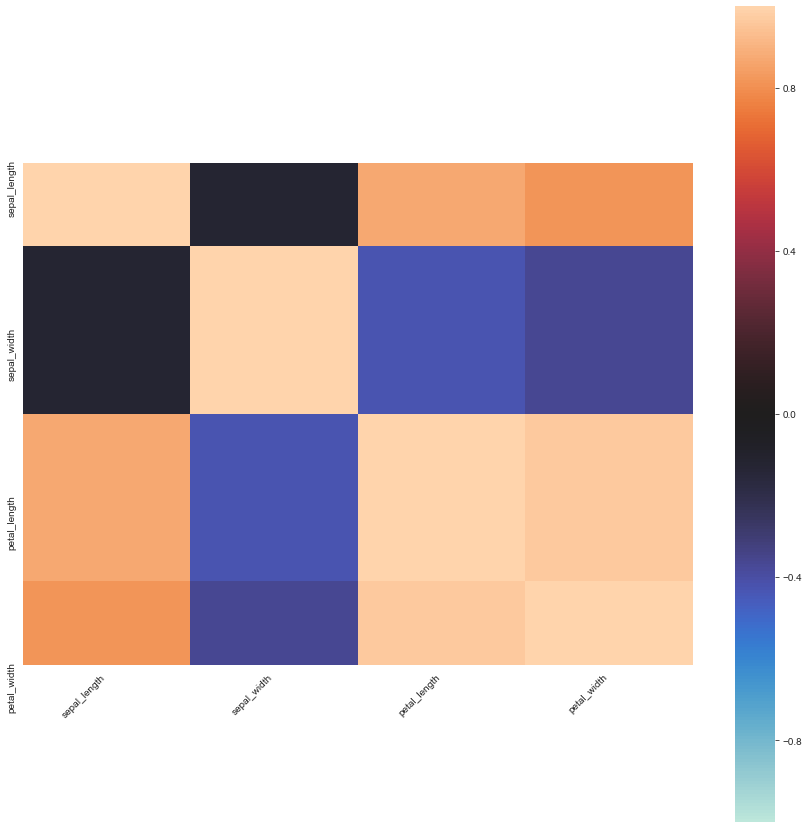

In [25]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
ax = sb.heatmap(
    irisCorr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [26]:
del iris, irisNum, irisCorr

### Correlation sorted by importance

In [171]:
import pandas as pd
d = {'x1': [1, 4, 4, 5, 6], 
     'x2': [0, 0, 8, 2, 4], 
     'x3': [2, 8, 8, 10, 12], 
     'x4': [-1, -4, -4, -4, -5]}
df = pd.DataFrame(data = d)
print("Data Frame")
print(df)
print()

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Data Frame
   x1  x2  x3  x4
0   1   0   2  -1
1   4   0   8  -4
2   4   8   8  -4
3   5   2  10  -4
4   6   4  12  -5

Correlation Matrix
          x1        x2        x3        x4
x1  1.000000  0.399298  1.000000 -0.969248
x2  0.399298  1.000000  0.399298 -0.472866
x3  1.000000  0.399298  1.000000 -0.969248
x4 -0.969248 -0.472866 -0.969248  1.000000

Top Absolute Correlations
x1  x3    1.000000
x3  x4    0.969248
x1  x4    0.969248
dtype: float64


### Change type from int64 to float64 and get log for skewed distributions

In [172]:
df_train['LotArea'] = df_train['LotArea'].astype(dtype=np.float64)
var = np.log(df_train.LotArea)

In [173]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Print feature levels

In [174]:
print("Supplies Subgroup' : ",df_train['SaleCondition'].unique())

Supplies Subgroup' :  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


### Get numeric values from a categorical feature

In [175]:
#from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# create the Labelencoder object
le = LabelEncoder()
df_train['SaleConditionCode'] = le.fit_transform(df_train['SaleCondition'])
df_train[["SaleCondition", "SaleConditionCode"]].head(11)

,SaleCondition,SaleConditionCode
0,Normal,4
1,Normal,4
2,Normal,4
3,Abnorml,0
4,Normal,4
5,Normal,4
6,Normal,4
7,Normal,4
8,Abnorml,0
9,Normal,4


### Missing Data
Ref.: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/


### Missing data percentage

In [176]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [177]:
type(total)

pandas.core.series.Series

In [178]:
# Getting rid missing value features that have Total greater than 100
train = df_train.drop((missing_data[missing_data['Total'] > 100]).index,1)

### Replace missing value with an specific value and mean

In [179]:
# categorical feature
df_train.GarageQual.value_counts(dropna=False)
df_train['GarageQual'].fillna('TA', inplace=True)

In [180]:
# Numerical feature
mean_value=df_train['MasVnrArea'].mean()
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(mean_value)

### Function to display graphically NaN values in a dataset
##### missmap Function
##### I could not find an equivalent of the missmap function in Python. The following function was obtained from here
##### http://stackoverflow.com/questions/21925114/is-there-an-implementation-of-missingmaps-in-pythons-ecosystem
##### All credit to Tom Augspurger. Minimal changes were made to make it Python 3 compatible

In [181]:
datos = 'titanic.csv'
titanic = pd.read_csv(datos)

In [182]:
def missmap(df, ax=None, colors=None, aspect=4, sort='descending',
            title=None, **kwargs):
    """
    Plot the missing values of df.

    Parameters
    ----------
    df : pandas DataFrame
    ax : matplotlib axes
        if None then a new figure and axes will be created
    colors : dict
        dict with {True: c1, False: c2} where the values are
        matplotlib colors.
    aspect : int
        the width to height ratio for each rectangle.
    sort : one of {'descending', 'ascending', None}
    title : str
    kwargs : dict
        matplotlib.axes.bar kwargs

    Returns
    -------
    ax : matplotlib axes

    """

    if ax is None:
        fig, ax = plt.subplots()

    # setup the axes
    dfn = pd.isnull(df)

    if sort in ('ascending', 'descending'):
        counts = dfn.sum()
        sort_dict = {'ascending': True, 'descending': False}
        counts = counts.sort_values(ascending=sort_dict[sort])
        dfn = dfn[counts.index]

    # Up to here
    ny = len(df)
    nx = len(df.columns)
    # each column is a stacked bar made up of ny patches.
    xgrid = np.tile(np.arange(nx), (ny, 1)).T
    ygrid = np.tile(np.arange(ny), (nx, 1))
    # xys is the lower left corner of each patch
    xys = (zip(x, y) for x, y in zip(xgrid, ygrid))

    if colors is None:
        colors = {True: '#EAF205', False: 'k'}

    widths = cycle([aspect])
    heights = cycle([1])

    for xy, width, height, col in zip(xys, widths, heights, dfn.columns):
        color_array = dfn[col].map(colors)

        rects = [Rectangle(xyc, width, height, **kwargs)
                 for xyc, c in zip(xy, color_array)]

        p_coll = collections.PatchCollection(rects, color=color_array,
                                             edgecolor=color_array, **kwargs)
        ax.add_collection(p_coll, autolim=False)

    # post plot aesthetics
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)

    ax.set_xticks(.5 + np.arange(nx))  # center the ticks
    ax.set_xticklabels(dfn.columns)
    for t in ax.get_xticklabels():
        t.set_rotation(90)

    # remove tick lines
    ax.tick_params(axis='both', which='both', bottom='off', left='off',
                   labelleft='off')
    ax.grid(False)

    if title:
        ax.set_title(title)
    return ax

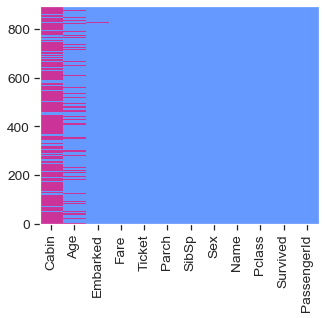

In [183]:
colours = {True: "#CC3399", False: "#6699FF"}
ax = missmap(titanic, colors = colours)
plt.show(ax)

### Identifying missing values in tabular data

In [184]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [185]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### Eliminating samples or features with missing values

In [186]:
# remove rows that contain missing values

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [187]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [188]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [189]:
# only drop rows where all columns are NaN

df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [190]:
# drop rows that have less than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [191]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Imputing missing values

In [192]:
# again: our original array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [193]:
# impute missing values via the column mean

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

### Categorical data - Nominal and ordinal features

In [194]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Categorical data - Mapping ordinal features

In [195]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [196]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### Encoding class labels

In [197]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [198]:
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [199]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [200]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [201]:
# reverse mapping
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

### Cross table
Ref.: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

In [202]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleConditionCode
0,1,60,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,4
1,2,20,RL,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,4
2,3,60,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,4
3,4,70,RL,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,4


In [203]:
# Two vars
pd.crosstab(index=train["Street"], 
            columns=train["LotShape"], margins=True)

LotShape,IR1,IR2,IR3,Reg,All
Street,,,,,
Grvl,1,1,0,4,6
Pave,483,40,10,921,1454
All,484,41,10,925,1460


### Convert to Categorical

In [204]:
df1 = {
    'Name':['George','Andrea','micheal','maggie','Ravi',
               'Xien','Jalpa'],
   'Is_Male':[1,0,1,0,1,1,0]}
 
df1 = pd.DataFrame(df1,columns=['Name','Is_Male'])
 
print(df1)

      Name  Is_Male
0   George        1
1   Andrea        0
2  micheal        1
3   maggie        0
4     Ravi        1
5     Xien        1
6    Jalpa        0


In [205]:
print(df1.dtypes)

Name       object
Is_Male     int64
dtype: object


In [206]:
df1['Is_Male'] = pd.Categorical(df1.Is_Male)
print (df1.dtypes)

Name         object
Is_Male    category
dtype: object


In [207]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
Name       7 non-null object
Is_Male    7 non-null category
dtypes: category(1), object(1)
memory usage: 287.0+ bytes


In [208]:
del df1

### Outlier Treatment

#### Interquartiel range outlier removal. USE: rm_IQR_outliers(titanic, 'Fare')

In [209]:
def rm_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

In [210]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

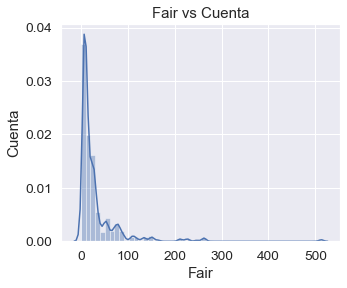

In [212]:
fig=sb.distplot(titanic['Fare'])
plt.xlabel("Fair")
plt.ylabel("Cuenta")
plt.title("Fair vs Cuenta") # You can comment this line out if you don't need title
plt.show(fig)

In [213]:
rm_IQR_outliers(titanic, 'Fare')

In [214]:
titanic.Fare.describe()

count    891.000000
mean      27.043158
std       27.339465
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      100.268800
Name: Fare, dtype: float64

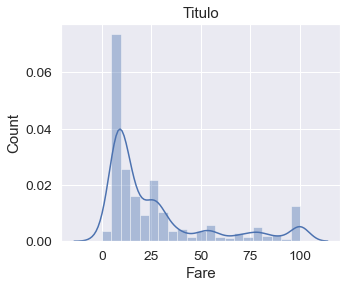

In [215]:
ax = sb.distplot(titanic['Fare'])

ax.set(xlabel='Fare', ylabel='Count', title='Titulo')
plt.show()

### Standardize and Normalize
Ref.: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

#### Standardize

In [216]:
# from sklearn import preprocessing
datos = 'titanic.csv'
titanic = pd.read_csv(datos)
df_numerics_only = titanic.select_dtypes(include=[np.number])
df_numerics_only = df_numerics_only.iloc[:, np.r_[0:2,4,6]]

In [217]:
df_numerics_only.head()

,PassengerId,Survived,SibSp,Fare
0,1,0,1,7.2500
1,2,1,1,71.2833
2,3,1,0,7.9250
3,4,1,1,53.1000
4,5,0,0,8.0500


In [218]:
# Get column names first
names = ['Fare']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(titanic[names])
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [219]:
scaled_df.head()

,Fare
0,-0.502445
1,0.786845
2,-0.488854
3,0.420730
4,-0.486337


In [220]:
del scaled_df, df_numerics_only

#### Normalize

In [221]:
names = ['Fare'] # or names = df.columns
# Normalize total_bedrooms column
#x_array = np.array(titanic['Fare'])
x_array = np.array(titanic['Fare'])
normalized_X = preprocessing.normalize([x_array])
normalized_df = pd.DataFrame(normalized_X.flatten(), columns=names)

In [222]:
normalized_df.head()

,Fare
0,0.004103
1,0.040344
2,0.004485
3,0.030053
4,0.004556


In [223]:
del normalized_X, normalized_df

#### Normalize data to certain range of values, ej. 0.25-0.5

In [224]:
l = [0.92323, 0.7232322, 0.93832, 0.4344433]
lower, upper = 0.25, 0.5
l_norm = [lower + (upper - lower) * x for x in l]
l_norm

[0.4808075, 0.43080805, 0.48458, 0.35861082499999997]

#### Normalize data based on Frequency

In [225]:
data = [[1, 89], [2, 54], [3, 45], [4, 67], [5, 78], [6, 80]]
df = pd.DataFrame(data, columns = ['id', 'data'])

In [226]:
qc = pd.qcut(df['data'], q=3, precision=0)
qc

0    (79.0, 89.0]
1    (44.0, 63.0]
2    (44.0, 63.0]
3    (63.0, 79.0]
4    (63.0, 79.0]
5    (79.0, 89.0]
Name: data, dtype: category
Categories (3, interval[float64]): [(44.0, 63.0] < (63.0, 79.0] < (79.0, 89.0]]

In [227]:
qc.value_counts().sort_index()

(44.0, 63.0]    2
(63.0, 79.0]    2
(79.0, 89.0]    2
Name: data, dtype: int64

### One-hot encoding

In [228]:
# get_dummies to emit N-1 variables to avoid collinearity then drop_first=True
cat_columns = ["Sex"]
df = pd.get_dummies(titanic, prefix_sep="_",
                              columns=cat_columns, drop_first=True)

In [229]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [230]:
del df

### Change column name in a Data Frame

In [231]:
# Data Frame df it changes from Name to Nombre
df=titanic
df.rename(columns={'Name':'Nombre'}, inplace=True)

### Binning - Discretize
#### Ref. https://pbpython.com/pandas-qcut-cut.html

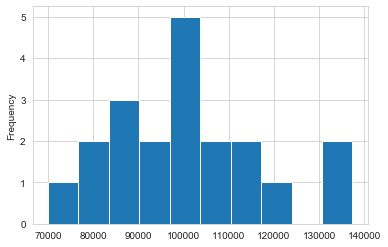

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

raw_df = pd.read_excel('2018_Sales_Total.xlsx')
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

df['ext price'].plot(kind='hist')

In [3]:
df['ext price'].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

#### Quantile-based Frequency discretization function

In [13]:
df['extPriceQuantile'] = pd.qcut(df['ext price'], q=4)

In [14]:
df.head()

,account number,name,ext price,extPriceBin,extPriceDecile,extPriceQuantile
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]","(70004.359, 89137.708]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]","(89137.708, 100271.535]"
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]","(70004.359, 89137.708]"
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]","(110132.552, 137351.96]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]","(89137.708, 100271.535]"


In [15]:
df['extPriceQuantile'].unique()

[(70004.359, 89137.708], (89137.708, 100271.535], (110132.552, 137351.96], (100271.535, 110132.552]]
Categories (4, interval[float64]): [(70004.359, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 137351.96]]

In [16]:
df['extPriceQuantile'].nunique()

4

In [20]:
df['extPriceQuantile'].value_counts()

(110132.552, 137351.96]     5
(100271.535, 110132.552]    5
(89137.708, 100271.535]     5
(70004.359, 89137.708]      5
Name: extPriceQuantile, dtype: int64

In [17]:
df['extPriceDecile'] = pd.qcut(df['ext price'], q=10, precision=0)

In [18]:
df['extPriceDecile'].head()

0      (82368.0, 87168.0]
1     (95908.0, 100272.0]
2      (70003.0, 82368.0]
3    (124627.0, 137352.0]
4      (90686.0, 95908.0]
Name: extPriceDecile, dtype: category
Categories (10, interval[float64]): [(70003.0, 82368.0] < (82368.0, 87168.0] < (87168.0, 90686.0] < (90686.0, 95908.0] ... (103606.0, 105938.0] < (105938.0, 112290.0] < (112290.0, 124627.0] < (124627.0, 137352.0]]

In [19]:
df['extPriceDecile'].nunique()

10

In [21]:
df['extPriceDecile'].value_counts()

(124627.0, 137352.0]    2
(112290.0, 124627.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(82368.0, 87168.0]      2
(70003.0, 82368.0]      2
Name: extPriceDecile, dtype: int64

In [22]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,extPriceBin,extPriceDecile,extPriceQuantile,quantile_ex_3
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]","(70004.359, 89137.708]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]","(89137.708, 100271.535]",Gold
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]","(70004.359, 89137.708]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]","(110132.552, 137351.96]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]","(89137.708, 100271.535]",Silver


#### User defined binning

In [24]:
df['extPriceUser'] = pd.cut(df['ext price'], bins=4)

In [25]:
df['extPriceUser'].unique()

[(69937.012, 86841.26], (86841.26, 103678.16], (120515.06, 137351.96], (103678.16, 120515.06]]
Categories (4, interval[float64]): [(69937.012, 86841.26] < (86841.26, 103678.16] < (103678.16, 120515.06] < (120515.06, 137351.96]]

In [26]:
df['extPriceUser'].nunique()

4

In [27]:
df['extPriceUser'].value_counts()

(86841.26, 103678.16]     9
(103678.16, 120515.06]    4
(69937.012, 86841.26]     4
(120515.06, 137351.96]    3
Name: extPriceUser, dtype: int64

#### Other Binning example. Ref. Ref.: https://www.youtube.com/watch?time_continue=174&v=8idAqRe0oiI


In [98]:
df = titanic
bins = [0, 12, 25, 50, 80] # IMPORTANT! For example the interval 12 to 25 means 12 to 24 
group_names = ['Niño', 'Adolecente', 'Adulto', 'Mayor']
df['Edad'] =  pd.cut(df['Age'], bins, labels=group_names)

In [99]:
df.Edad.head()

0    Adolecente
1        Adulto
2        Adulto
3        Adulto
4        Adulto
Name: Edad, dtype: category
Categories (4, object): [Niño < Adolecente < Adulto < Mayor]

In [ ]:
del df

### Date processing - date format: 2012-10-02 09:00:00	

In [234]:
# List1  
Name = ['tom', 'krish', 'nick', 'juli']  
    
# List2  
Age = [25, 30, 26, 22]  
    
# List2  
date = ['2012-10-02 09:00:00', '2015-12-12 09:00:00', '2017-08-25 09:00:00', '2012-10-02 09:00:00']  

# get the list of tuples from two lists.  
# and merge them by using zip().  
list_of_tuples = list(zip(Name, Age, date))  
    
# Assign data to tuples.  
list_of_tuples   
  
  
# Converting lists of tuples into  
# pandas Dataframe.  
df = pd.DataFrame(list_of_tuples, columns = ['Name', 'Age', 'date'])  
     
# Print data.  
df 

,Name,Age,date
0,tom,25,2012-10-02 09:00:00
1,krish,30,2015-12-12 09:00:00
2,nick,26,2017-08-25 09:00:00
3,juli,22,2012-10-02 09:00:00


In [235]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
#df['date'] = pd.to_datetime(df.date)

In [236]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour

In [237]:
df

,Name,Age,date,year,month,day,hour
0,tom,25,2012-10-02 09:00:00,2012,10,2,9
1,krish,30,2015-12-12 09:00:00,2015,12,12,9
2,nick,26,2017-08-25 09:00:00,2017,8,25,9
3,juli,22,2012-10-02 09:00:00,2012,10,2,9


### GRAPHICS
Ref.: https://www.kaggle.com/mjbahmani/top-5-data-visualization-libraries-tutorial/notebook#Top-5-Data-Visualization-Libraries-Tutorial-

In [238]:
address = 'mtcars.csv'
cars = pd.read_csv(address)

### matplotlib Histogram

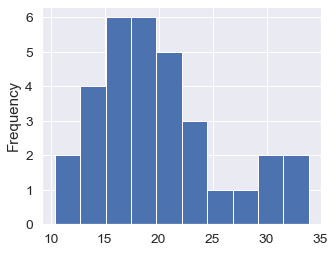

In [239]:
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names
mpg = cars['mpg']
mpg.plot(kind = 'hist')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

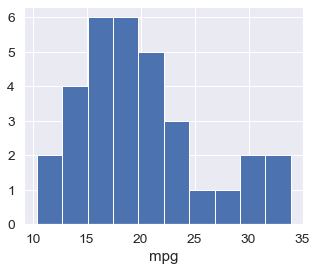

In [240]:
plt.hist(mpg)
plt.xlabel('mpg')
plt.ylabel('Count')

plt.plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d0d0e50>,
      dtype=object)

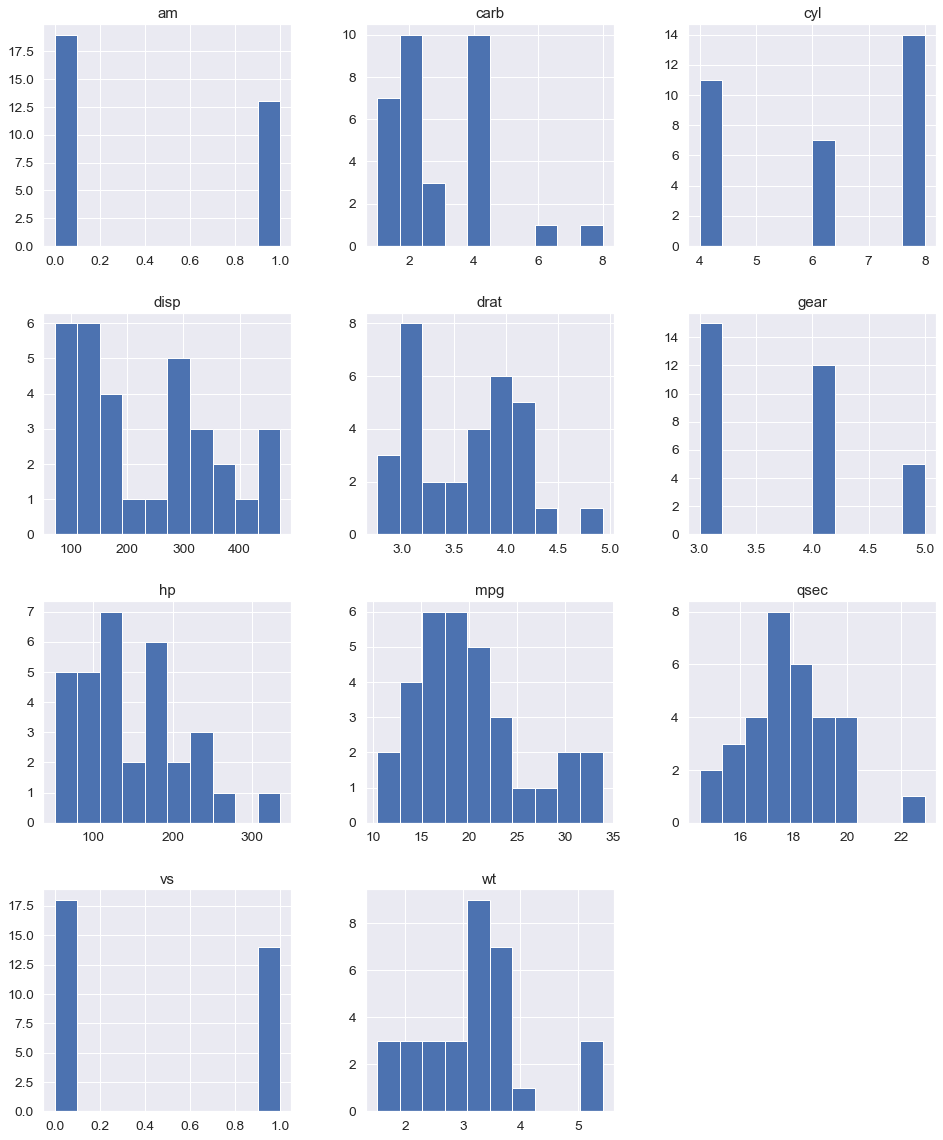

In [350]:
cars.hist(figsize=(16, 20)) #, xlabelsize=8, ylabelsize=8)
# cars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [351]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### seaborn Histogram

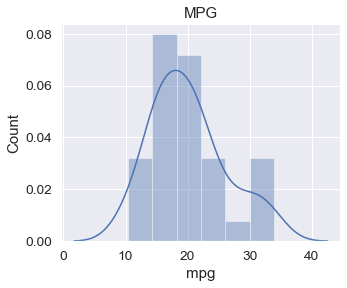

In [362]:
sb.distplot(mpg)
plt.xlabel("mpg")
plt.ylabel("Count")
plt.title("MPG") # You can comment this line out if you don't need title
plt.show(fig)

### matplotlib Scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


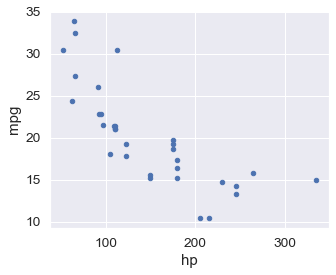

In [353]:
cars.plot(kind='scatter', x='hp', y='mpg')

In [354]:
### seaborn Scatter plot

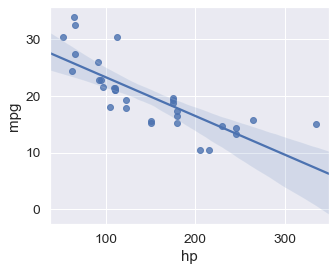

In [355]:
sb.regplot(x='hp', y='mpg', data = cars, scatter=True)

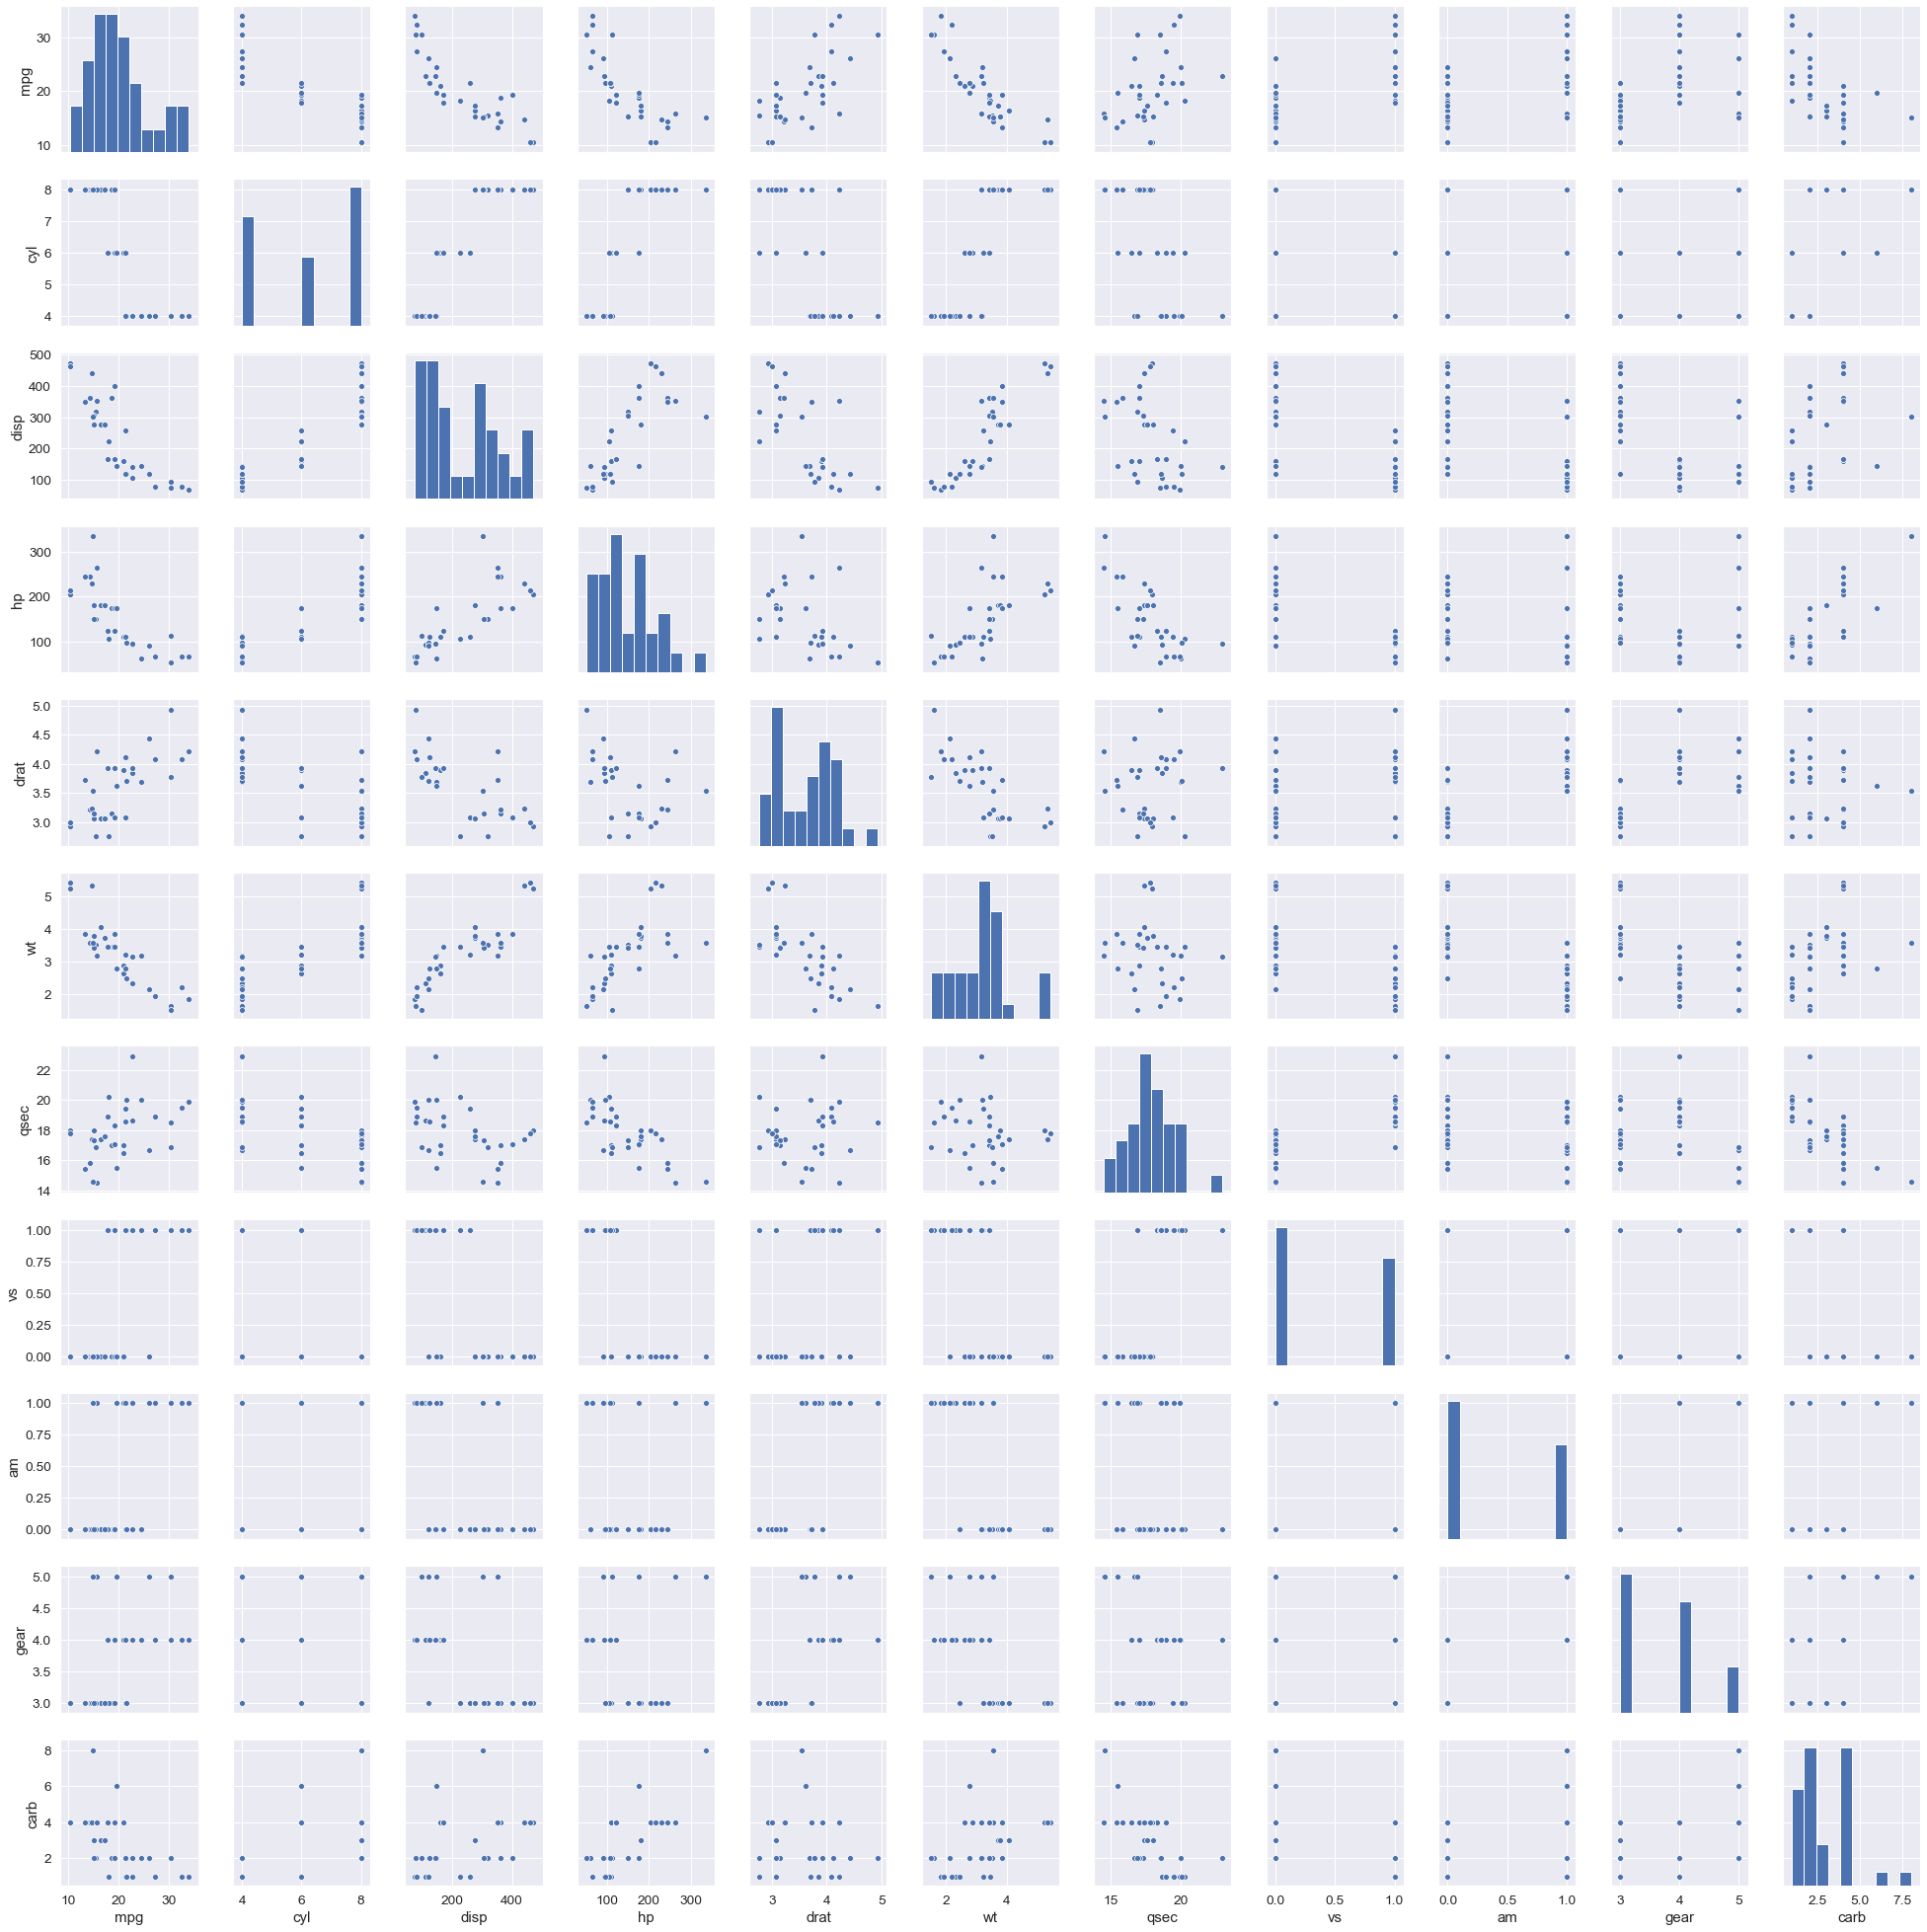

In [356]:
sb.pairplot(cars)

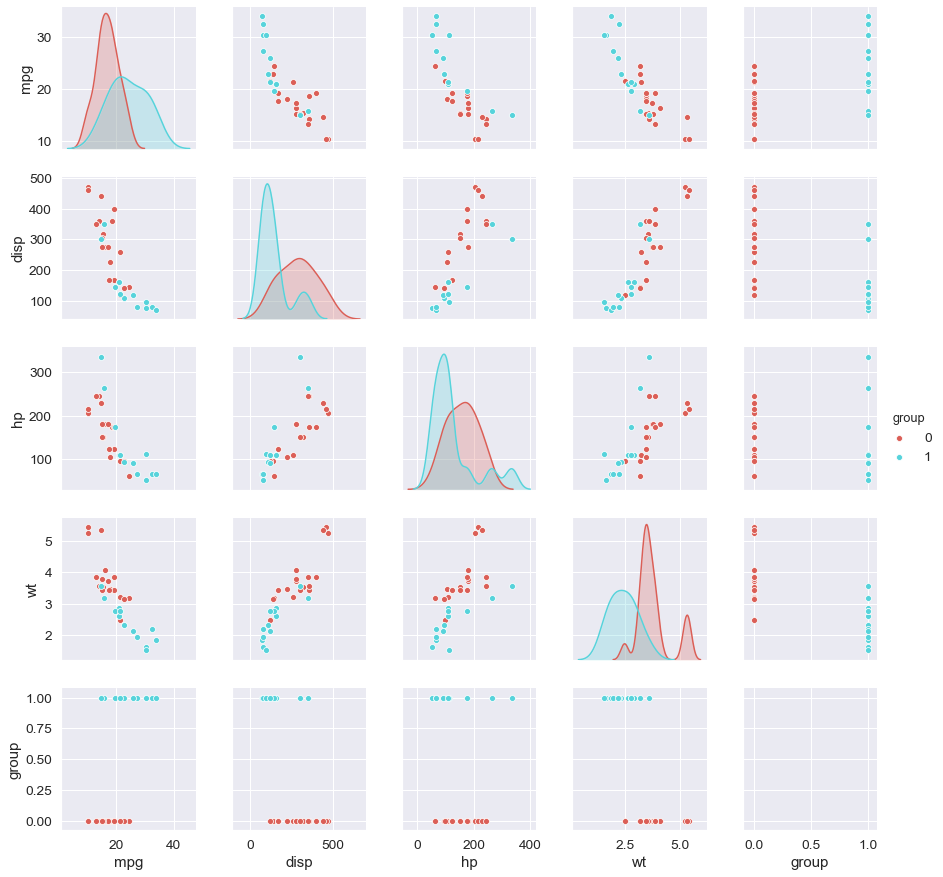

In [357]:
cars_df = pd.DataFrame((cars.ix[:, (1,3,4,6)].values), columns = ['mpg', 'disp', 'hp', 'wt'])
cars_target = cars.iloc[:, 9].values
target_names = [0, 1]

cars_df['group'] = pd.Series(cars_target, dtype="category")
sb.pairplot(cars_df, hue = "group", palette = 'hls')

### matplotlib boxplot

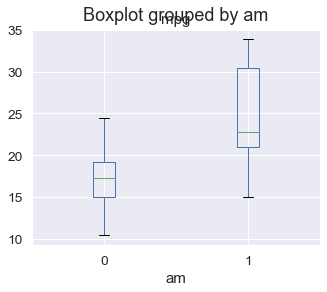

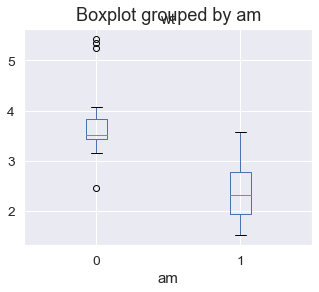

In [358]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

### seaborn boxplot

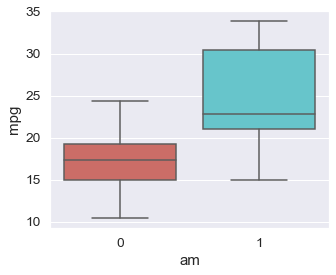

In [359]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

In [16]:
tips = sb.load_dataset('tips')

### seaborn Bar plot

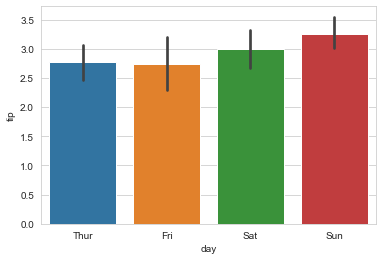

In [17]:
sb.barplot(x='day', y='tip', data=tips)

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


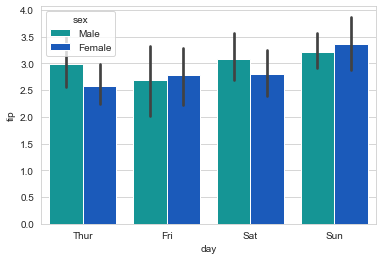

In [19]:
sb.barplot(x='day', y='tip', data=tips, hue ='sex', palette = 'winter_r')

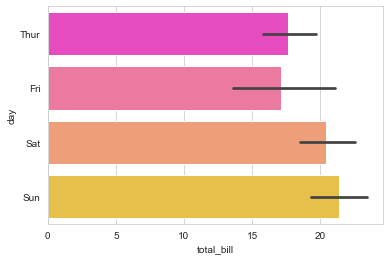

In [20]:
sb.barplot(x='total_bill', y='day', data=tips, palette='spring')

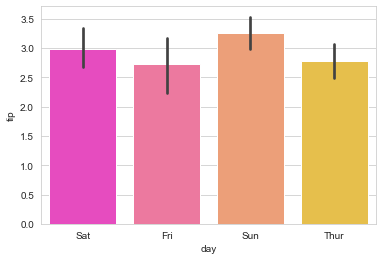

In [21]:
sb.barplot(x='day', y='tip', data=tips, palette='spring', order=['Sat','Fri','Sun','Thur'])

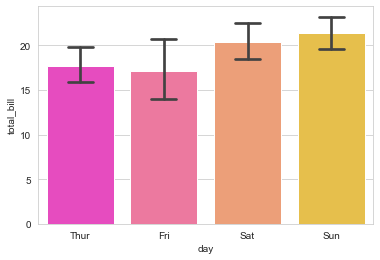

In [22]:
sb.barplot(x='day', y='total_bill', data=tips, estimator=mean, palette='spring', capsize = 0.3)

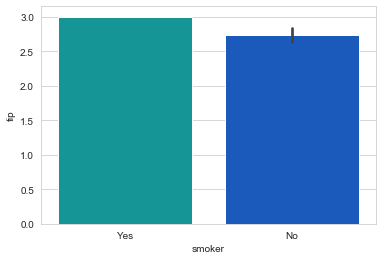

In [23]:
sb.barplot(x='smoker', y='tip', data=tips, ci=34, palette='winter_r', estimator=median)

In [24]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### seaborn Distribution / Histogram plot

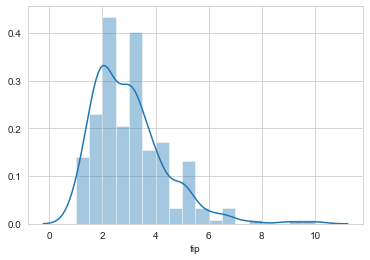

In [25]:
sb.distplot(tips['tip'])

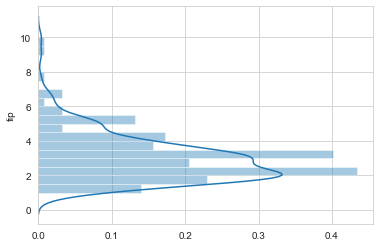

In [26]:
sb.distplot(tips['tip'], vertical=True)

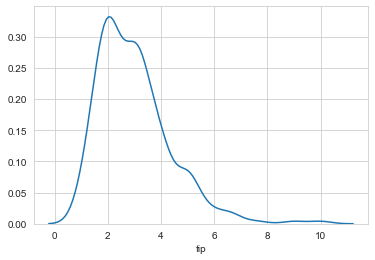

In [27]:
sb.distplot(tips['tip'], hist=False)

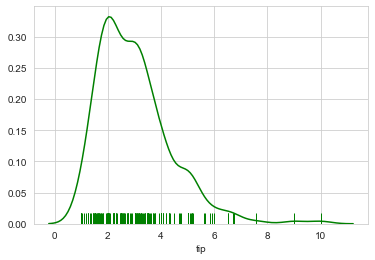

In [28]:
sb.distplot(tips['tip'], hist=False, rug=True, color='green')

### seaborn Box plot

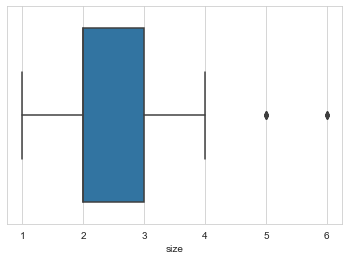

In [29]:
sb.boxplot(tips['size'])

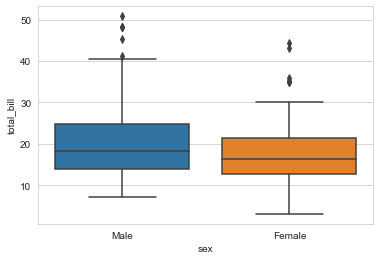

In [30]:
sb.boxplot(x='sex', y='total_bill', data=tips)

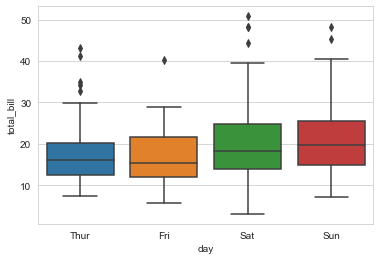

In [31]:
sb.boxplot(x='day', y='total_bill', data=tips)

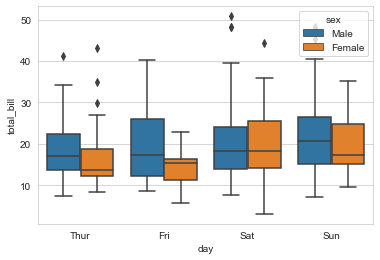

In [32]:
sb.boxplot(x='day', y='total_bill', data=tips, hue='sex')

In [33]:
iris=sb.load_dataset('iris')

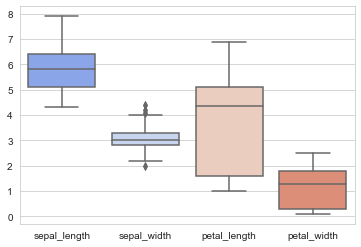

In [34]:
sb.boxplot(data=iris, palette='coolwarm')

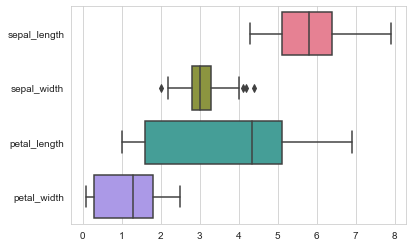

In [35]:
sb.boxplot(data=iris, orient='horizontal', palette='husl') # horizontal or h

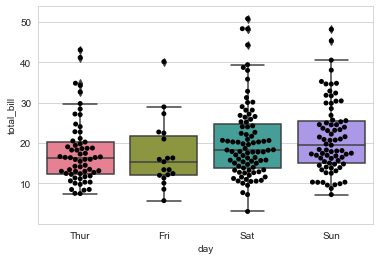

In [36]:
sb.boxplot(x='day', y='total_bill', data=tips, palette='husl')
sb.swarmplot(x='day', y='total_bill', data=tips, color='black')

### seaborn Scatter plot

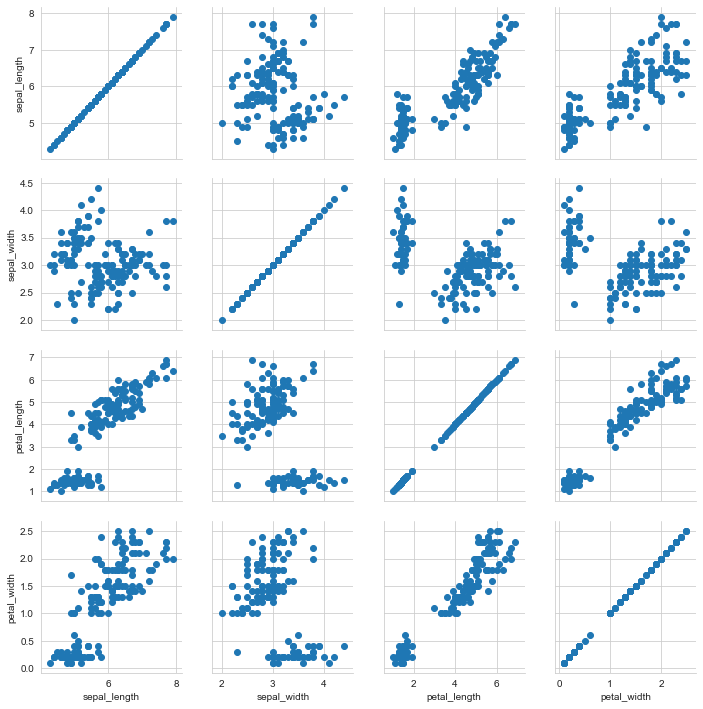

In [37]:
x = sb.PairGrid(iris)
x = x.map(plt.scatter)

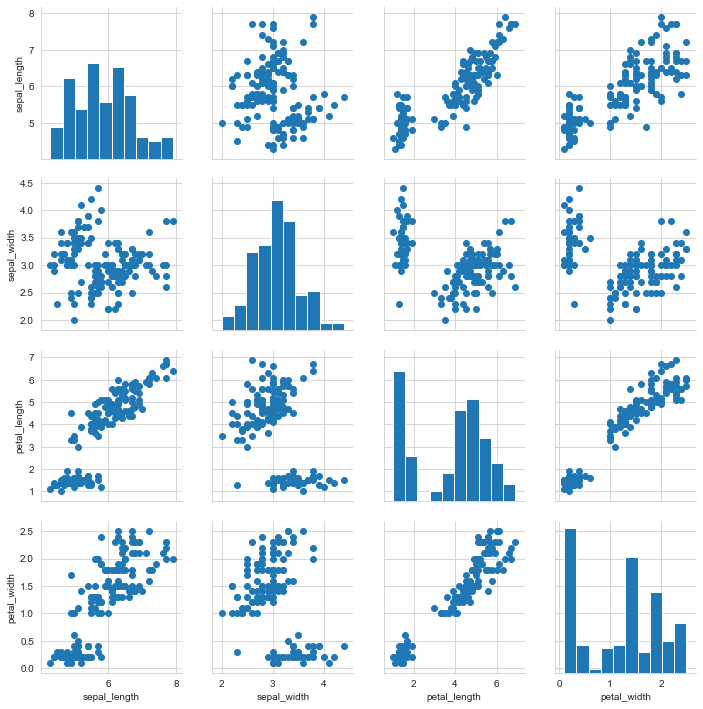

In [38]:
x = sb.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

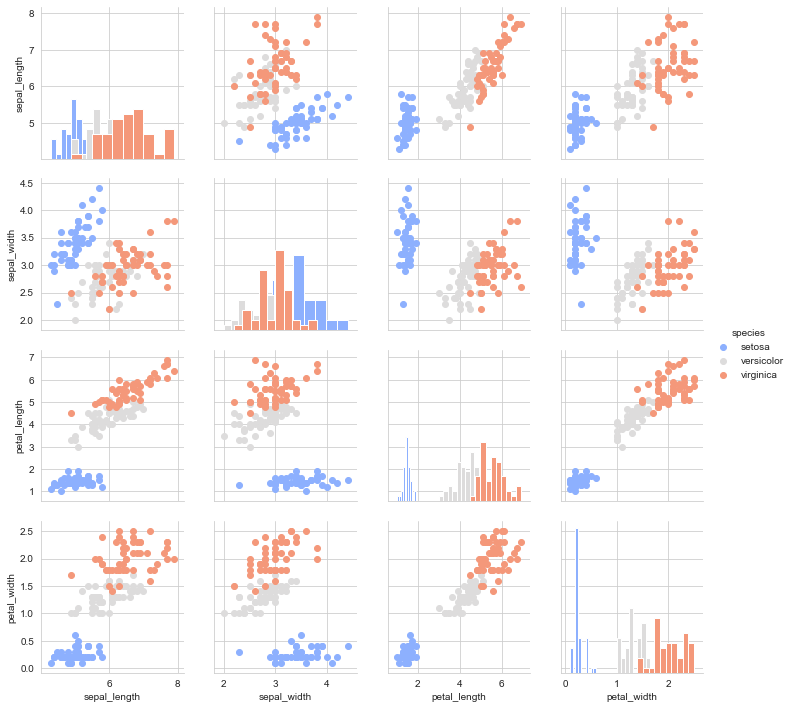

In [39]:
x = sb.PairGrid(iris, hue = 'species', palette='coolwarm')
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

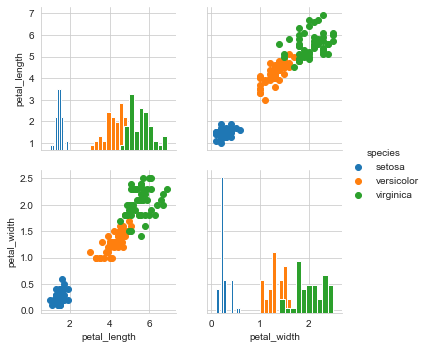

In [40]:
x = sb.PairGrid(iris, hue='species',vars=['petal_length','petal_width'])
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

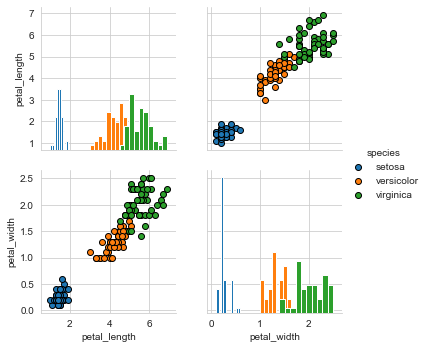

In [41]:
x = sb.PairGrid(iris, hue='species',vars=['petal_length','petal_width'])
x = x.map_diag(plt.hist, edgecolor='white')
x = x.map_offdiag(plt.scatter, edgecolor='black')
x = x.add_legend()

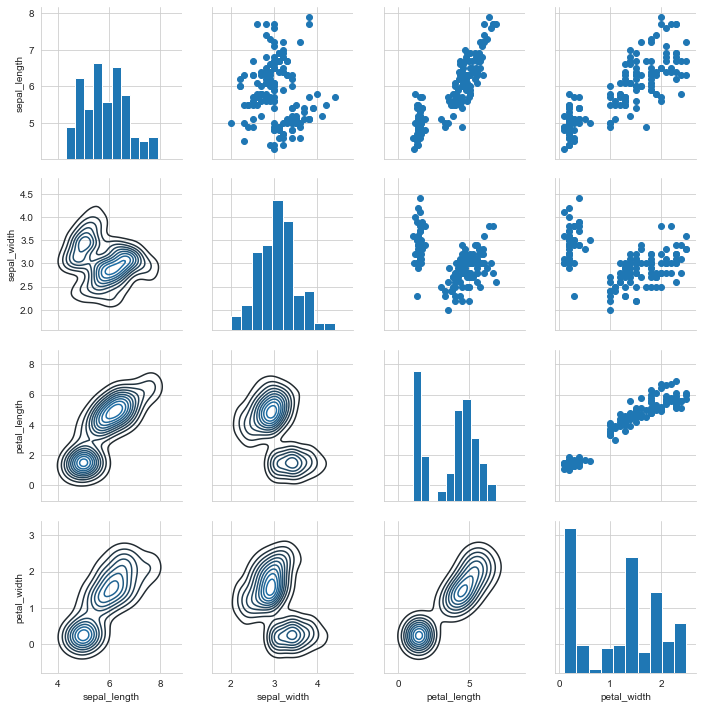

In [42]:
x = sb.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_upper(plt.scatter)
x = x.map_lower(sb.kdeplot)

### seaborn Heatmap plot

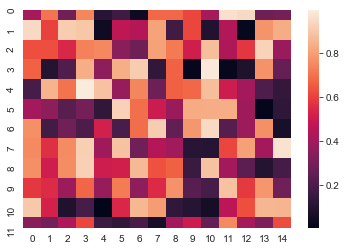

In [43]:
normal = np.random.rand(12,15)
sb.heatmap(normal)

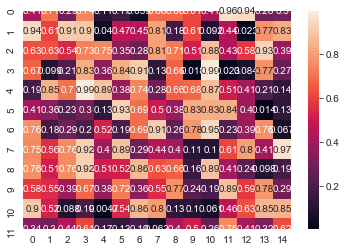

In [44]:
sb.heatmap(normal, annot=True)

In [45]:
flights = sb.load_dataset('flights')

In [46]:
flights.shape

(144, 3)

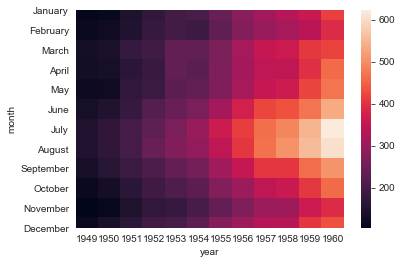

In [47]:
flights = flights.pivot('month', 'year', 'passengers')
sb.heatmap(flights)

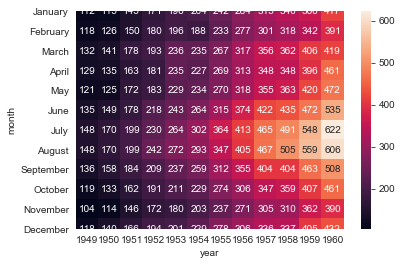

In [48]:
sb.heatmap(flights, annot=True, fmt='d')

### Facet Grids

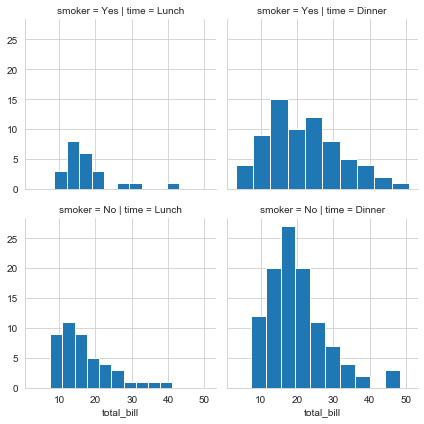

In [49]:
x = sb.FacetGrid(tips, row='smoker', col='time')
x = x.map(plt.hist, 'total_bill')

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


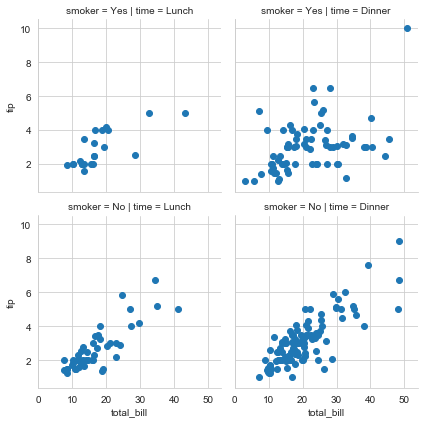

In [51]:
x = sb.FacetGrid(tips, col='time', row='smoker')
x = x.map(plt.scatter, 'total_bill', 'tip')

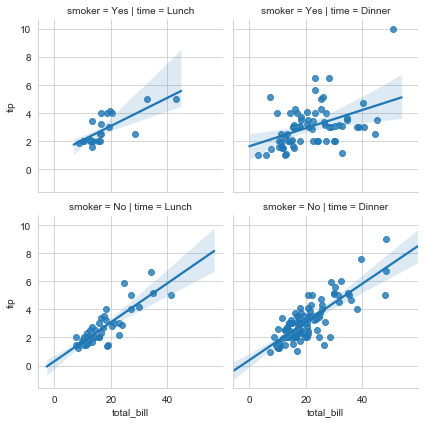

In [52]:
x = sb.FacetGrid(tips, col='time', row='smoker')
x = x.map(sb.regplot, 'total_bill', 'tip')

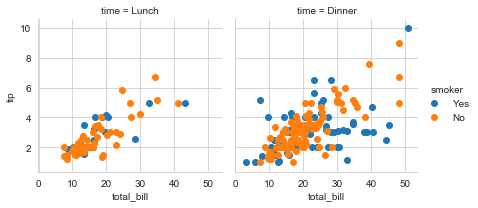

In [53]:
x = sb.FacetGrid(tips, col='time', hue='smoker')
x = x.map(plt.scatter, 'total_bill', 'tip').add_legend()

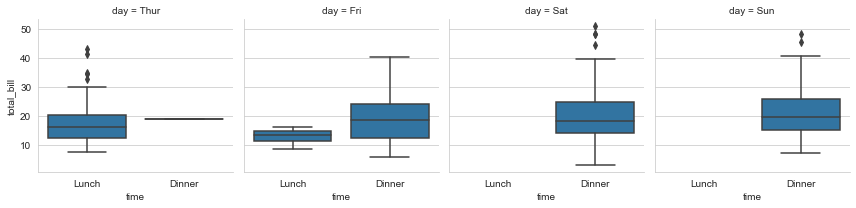

In [54]:
x = sb.FacetGrid(tips, col='day')
x = x.map(sb.boxplot, 'time', 'total_bill')

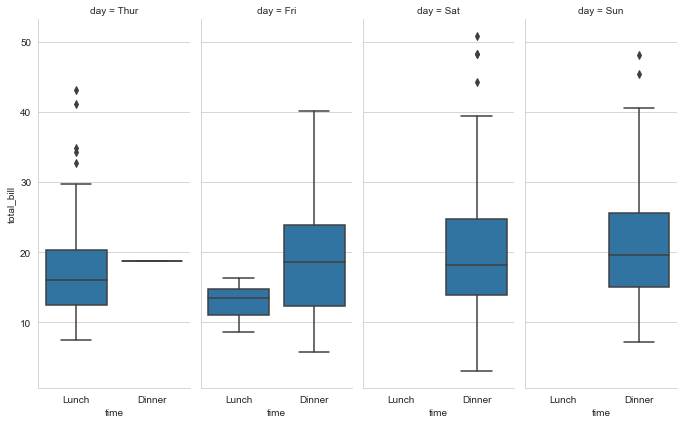

In [55]:
x = sb.FacetGrid(tips, col='day', size=6, aspect=.4)
x = x.map(sb.boxplot, 'time', 'total_bill')

### seaborn Cluster map

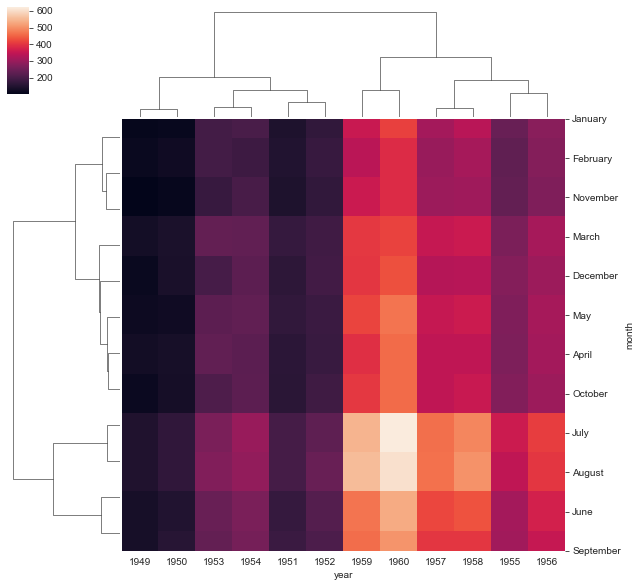

In [56]:
sb.clustermap(flights)

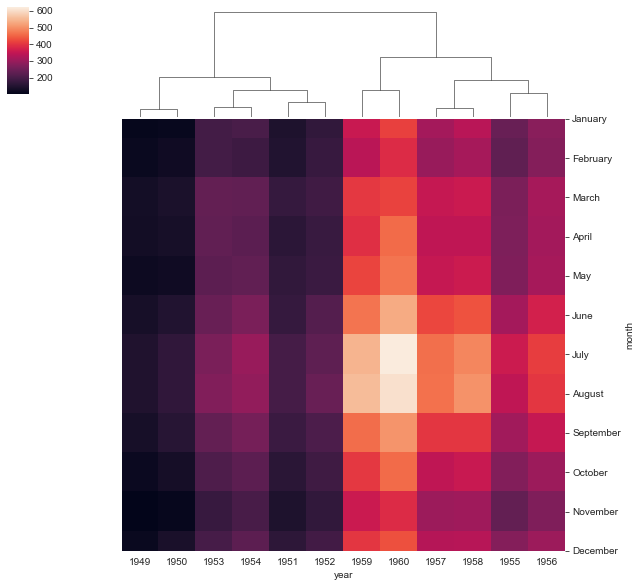

In [57]:
sb.clustermap(flights, row_cluster=False) # or col_cluster = False

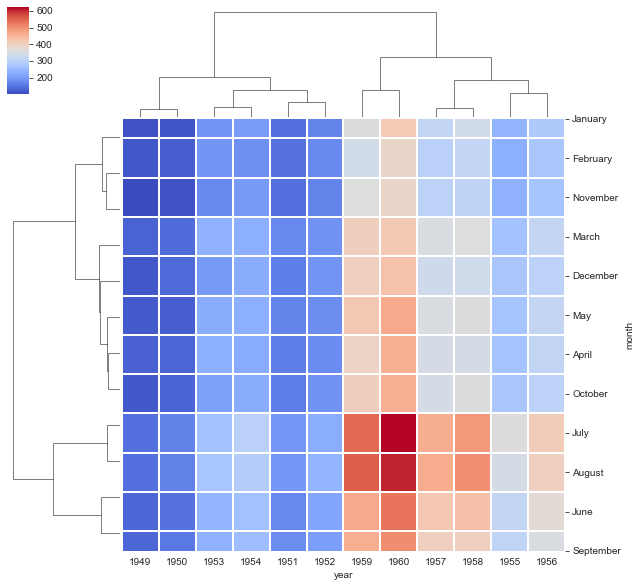

In [58]:
sb.clustermap(flights, cmap='coolwarm', linewidths=1)

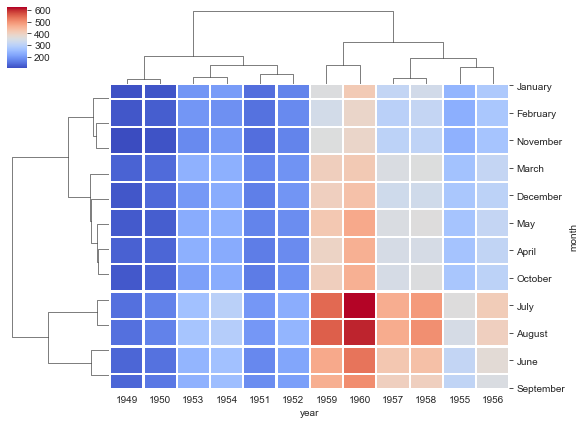

In [59]:
sb.clustermap(flights, cmap='coolwarm', linewidths=1.2, figsize=(9,7))

### seaborn Joint plot

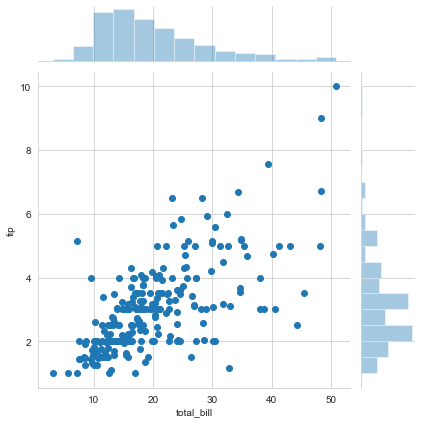

In [60]:
sb.jointplot(x='total_bill', y='tip', data=tips)

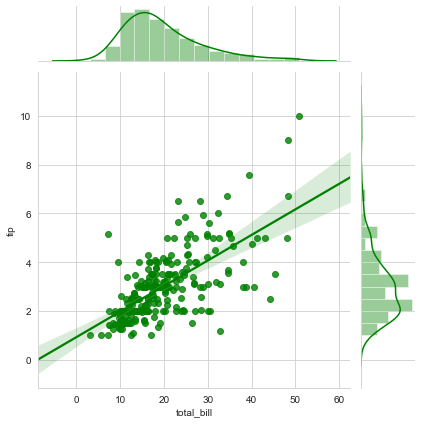

In [61]:
sb.jointplot(x='total_bill', y='tip', data=tips,color='green', kind='reg')

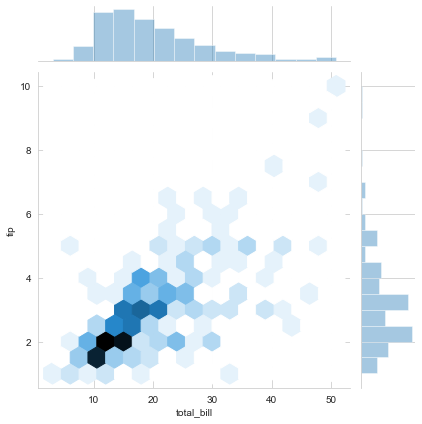

In [62]:
sb.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

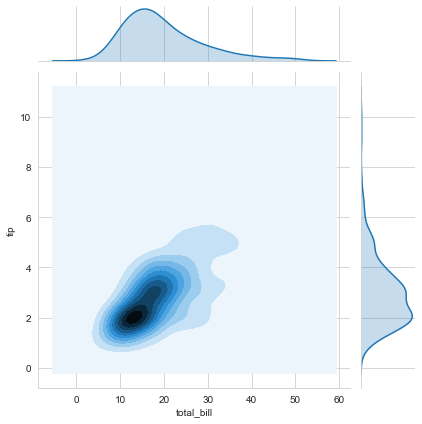

In [63]:
sb.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

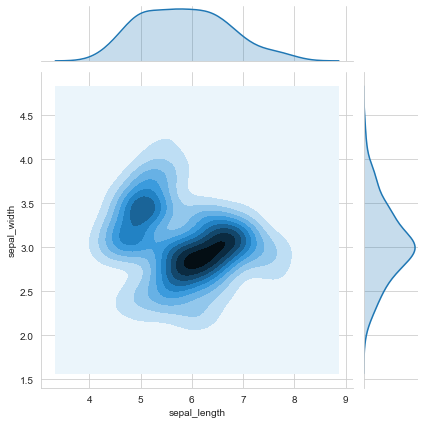

In [64]:
sb.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde')

### seaborn Reg plots

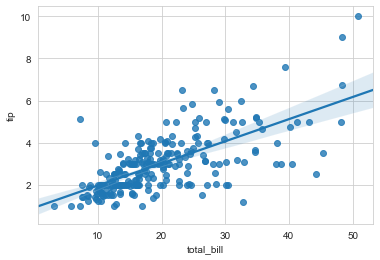

In [65]:
sb.regplot(x='total_bill', y='tip', data=tips)

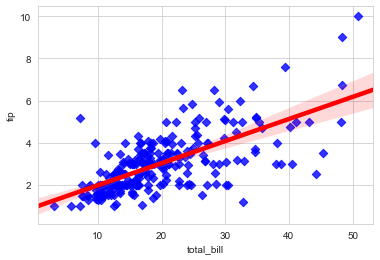

In [66]:
sb.regplot(x='total_bill', y='tip', data=tips, marker='D',\
           scatter_kws={'color':'blue'},\
           line_kws={'color':'red', 'linewidth':4.5})

In [67]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

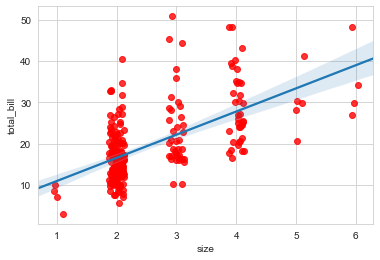

In [68]:
sb.regplot(x='size', y='total_bill', data=tips, x_jitter=0.13, scatter_kws={'color':'red'})

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Merge, Join and Concatenate
Ref.: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#### left: LEFT OUTER JOIN
#### right: RIGHT OUTER JOIN
#### outer: FULL OUTER JOIN
#### inner: INNER JOIN

Pandas vs. SQL: https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e

In [70]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])


df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

#### Like rbind in r

In [71]:
result = df1.append(df2, ignore_index=True, sort=False)

In [72]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


#### Like cbind in r

In [73]:
df4=df2

In [74]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [75]:
df4.columns = ['AA', 'BB', 'CC', 'DD']

In [76]:
df4 = df4.reset_index()

In [77]:
resultado = pd.concat([df1, df4], axis = 1)

In [78]:
resultado

,A,B,C,D,index,AA,BB,CC,DD
0,A0,B0,C0,D0,4,A4,B4,C4,D4
1,A1,B1,C1,D1,5,A5,B5,C5,D5
2,A2,B2,C2,D2,6,A6,B6,C6,D6
3,A3,B3,C3,D3,7,A7,B7,C7,D7


In [79]:
del resultado['index']

#### Concatenate

In [80]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
result = df1.append(s2, ignore_index=True)

In [81]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


#### Merge

In [82]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
result = pd.merge(left, right, on=['key1', 'key2'])

In [83]:
# how = 'left' or 'right', or 'inner' or 'outer'
result = pd.merge(left, right, how='inner', on=['key1', 'key2'])

In [84]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [85]:
# If the user is aware of the duplicates in the right DataFrame 
# but wants to ensure there are no duplicates in the left DataFrame,
#one can use the validate='one_to_many' argument instead
result = pd.merge(left, right, on='key2', how='outer') #, validate="one_to_many")

In [86]:
result

,key1_x,key2,A,B,key1_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K0,A0,B0,K1,C1,D1
2,K0,K0,A0,B0,K1,C2,D2
3,K0,K0,A0,B0,K2,C3,D3
4,K1,K0,A2,B2,K0,C0,D0
5,K1,K0,A2,B2,K1,C1,D1
6,K1,K0,A2,B2,K1,C2,D2
7,K1,K0,A2,B2,K2,C3,D3
8,K0,K1,A1,B1,NaN,NaN,NaN
9,K2,K1,A3,B3,NaN,NaN,NaN


### Mapping values

In [1]:
def switch_demo(argument):
    switcher = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }
    return switcher.get(argument, "Invalid month")

In [2]:
switch_demo(3)

'March'

### IMBALANCE DATA TREATMENT - OVERSAMPLING
Ref.: https://github.com/krishnaik06/Handle-Imbalanced-Dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [2]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


Text(0, 0.5, 'Frequency')

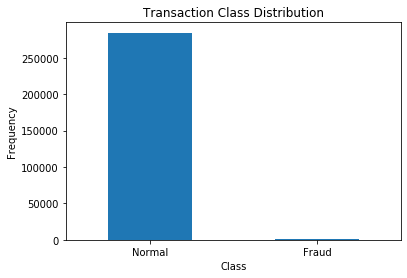

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### First option imbalance data - OVERSAMPLING

In [7]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [8]:
# Implementing OVERSAMPLING for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [9]:
X_res.shape,y_res.shape

((567562, 30), (567562,))

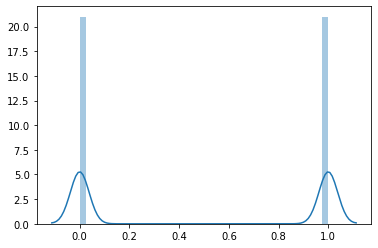

In [10]:
sns.distplot(y_res)

In [11]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


### Second option imbalance data - OVERSAMPLING

In [12]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [13]:
os =  RandomOverSampler(ratio=0.5)

In [14]:
X_train_res, y_train_res = os.fit_sample(X, Y)

In [15]:
X_train_res.shape,y_train_res.shape

((426472, 30), (426472,))

In [16]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 142157})


### Third option imbalance data - OVERSAMPLING

In [17]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=0.5)
X_train_res1, y_train_res1 = os_us.fit_sample(X, Y)

In [18]:
X_train_res1.shape,y_train_res1.shape

((424846, 30), (424846,))

In [19]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283502, 1: 141344})


### First option imbalance data - UNDERSAMPLING

In [8]:
from imblearn.under_sampling import NearMiss

In [9]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)

In [10]:
X_res.shape,y_res.shape


((984, 30), (984,))

In [11]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


### FEATURE ENGINEERING

In [1]:
import category_encoders as ce

In [2]:
datos = 'titanic.csv'
dataset = pd.read_csv(datos)

In [3]:
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Count Encoding

In [4]:
cat_features = ['Sex', 'Embarked']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(dataset[cat_features])

In [5]:
data = dataset.join(count_encoded.add_suffix("_count"))

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_count,Embarked_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,577,644
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,314,168
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,314,644
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,314,644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,577,644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,577,644
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,314,644
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,314,644
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,577,168


### Target Encoding

In [9]:
datos = 'titanic.csv'
dataset = pd.read_csv(datos)

In [10]:
cat_features = ['Sex', 'Embarked']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(dataset[cat_features])

In [11]:
# Create the encoder itself
target_enc = ce.TargetEncoder(cols=cat_features)

In [13]:
#train, valid, _ = get_data_splits(data)

# Fit the encoder using the categorical features and target
target_enc.fit(dataset[cat_features], dataset['Survived'])


TargetEncoder(cols=['Sex', 'Embarked'], drop_invariant=False,
              handle_missing='value', handle_unknown='value',
              min_samples_leaf=1, return_df=True, smoothing=1.0, verbose=0)

In [16]:
data = dataset.join(target_enc.transform(dataset[cat_features]).add_suffix('_target'))

In [17]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_target,Embarked_target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908,0.336957
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038,0.336957
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038,0.336957
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908,0.336957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908,0.336957
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038,0.336957
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038,0.336957
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908,0.553571
